In [16]:
import numpy as np
import pandas as pd
import os

def Slope(X, Y, axis=1):
    sorted_idx = np.argsort(X, axis=axis)
    X = np.take_along_axis(X, sorted_idx, axis=axis)
    Y = np.take_along_axis(Y, sorted_idx, axis=axis)
    if axis==1:
        delta_X = X[:,1:] - X[:,:-1]
        delta_Y = Y[:,1:] - Y[:,:-1]
    if axis==0:
        delta_X = X[1:] - X[:-1]
        delta_Y = Y[1:] - Y[:-1]
    return delta_Y / delta_X

def recovery_curve(x, slope, y0=0.5):
    delta_x = x[1:] - x[:-1]
    delta_y = delta_x*slope
    y = np.array([delta_y[:i].sum() for i in range(1, len(x), 1)]) + y0
    y = np.hstack((np.array([y0]), y))
    return y
s_c = '結算價'
top_path = './../../../'
Data_path = top_path + 'InterpData/'
expiry = 'NearbyMonth'
K_fixed = 'NotFixed'
OCRange = 1
IV_type = 'callIV'
K_Range = [0, 500]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])
IV_path = '{}/{}/{}/{}/{}/{}'.format(Data_path, expiry, K_fixed, OCRange, IV_type, K_Range_file)

Dir_tree = [top_path, 'ForecastData', expiry, K_fixed, str(OCRange), IV_type, K_Range_dir]
current_path = Dir_tree[0]
for i in range(1, len(Dir_tree), 1):
    if Dir_tree[i] not in os.listdir(current_path):
        os.mkdir(current_path + Dir_tree[i])
    current_path = current_path + Dir_tree[i] + '/'

IV_data = pd.read_csv(IV_path, encoding='Big5', index_col=False)
IV_matrix = np.array(IV_data)

#----------------------------------------------------------------------------


OC = abs(np.array(IV_data['期貨開盤價'] - IV_data['期貨收盤價']))
HL = np.array(IV_data['期貨最高價'] - IV_data['期貨最低價'])

expirty_days = np.array(IV_data['到期天數'])
OCHLK = np.vstack((OC, HL)).T



IV_matrix = np.array(IV_data)
K_num = len(np.where(IV_matrix[0, 0] == IV_matrix)[0])
K = np.array(IV_data['履約價'])
K = np.reshape(K, (-1, K_num))
IV= np.array(IV_data['隱含波動率({})'.format(s_c)])
IV = np.reshape(IV, (-1, K_num))
K_IVslope = Slope(X=K, Y=IV, axis=1)

FileNotFoundError: [Errno 2] No such file or directory: './../../../InterpData//NearbyMonth/NotFixed/1/callIV/0_500.csv'

In [10]:
def TimeSeriesData(X, seq_length):
    X_train = np.zeros((len(X)-seq_length, seq_length, len(X[0])))
    y_train = np.zeros((len(X)-seq_length, len(X[0])))
    for i in range(len(X) - seq_length):
        X_train[i] = X[i:i+seq_length]
        y_train[i] = (X[i+seq_length])
    return np.array(X_train), np.array(y_train)
seq_length = 7
magnification_slope = 10000
IV_matrix_forecast = IV_matrix[seq_length*K_num:]

Inputs_slope, Ouputs = TimeSeriesData(K_IVslope*magnification_slope, seq_length=seq_length)

Inputs_OHLCK = OCHLK[range(0, len(IV_matrix), K_num)]
Inputs_OHLCK = np.array([Inputs_OHLCK[i:i+seq_length+1] for i in range(len(Inputs_OHLCK)-seq_length)])
Inputs_OHLCK = Inputs_OHLCK.astype(float)




Inputs_expirty = expirty_days[range(0, len(IV_matrix), K_num)]
Inputs_expirty = np.array([Inputs_expirty[i:i+seq_length+1] for i in range(len(Inputs_expirty)-seq_length)])
Inputs_expirty = Inputs_expirty.astype(float)
Inputs_expirty = np.reshape(Inputs_expirty, (Inputs_expirty.shape[0], Inputs_expirty.shape[1], 1))

train_size = int(len(Inputs_slope)*0.8)
X_train = Inputs_slope[:train_size]
OHLCK_train = Inputs_OHLCK[:train_size]
y_train = Ouputs[:train_size]
Inputs_expirty_train = Inputs_expirty[:train_size]

X_test = Inputs_slope[train_size:]
y_test = Ouputs[train_size:]
IV_matrix_test = IV_matrix_forecast[K_num*train_size:]
OHLCK_test = Inputs_OHLCK[train_size:]
Inputs_expirty_test = Inputs_expirty[train_size:]



Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 7.3806 - mse: 7.3806 - val_loss: 4.1245 - val_mse: 4.1245
Epoch 2/50
1/1 [==============================] - 1s 857ms/step - loss: 4.7961 - mse: 4.7961 - val_loss: 2.8732 - val_mse: 2.8732
Epoch 3/50
1/1 [==============================] - 1s 825ms/step - loss: 4.2499 - mse: 4.2499 - val_loss: 2.8722 - val_mse: 2.8722
Epoch 4/50
1/1 [==============================] - 1s 831ms/step - loss: 3.8665 - mse: 3.8665 - val_loss: 3.0060 - val_mse: 3.0060
Epoch 5/50
1/1 [==============================] - 1s 841ms/step - loss: 3.5732 - mse: 3.5732 - val_loss: 2.3694 - val_mse: 2.3694
Epoch 6/50
1/1 [==============================] - 1s 827ms/step - loss: 3.2899 - mse: 3.2899 - val_loss: 2.4180 - val_mse: 2.4180
Epoch 7/50
1/1 [==============================] - 1s 829ms/step - loss: 3.0748 - mse: 3.0748 - val_loss: 2.6293 - val_mse: 2.6293
Epoch 8/50
1/1 [==============================] - 1s 819ms/step - loss: 2.9067 - mse: 2.9067 

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_30660\1362217891.py:54: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


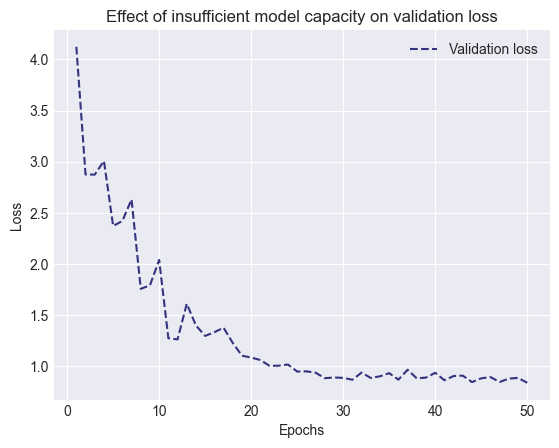

In [11]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, concatenate
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# 定義第一個LSTM模型
input_lstm_OHLCK = Input(shape=OHLCK_train.shape[1:])
hidden1_OHLCK = LSTM(500, return_sequences=True, activation='relu')(input_lstm_OHLCK)
hidden2_OHLCK = LSTM(200, activation='relu')(hidden1_OHLCK)
output_OHLCK = Dense(100)(hidden2_OHLCK)

# 定義第二個LSTM模型
input_lstm_slope = Input(shape=X_train.shape[1:])
#lstm1 = LSTM(200, return_sequences=True, activation='relu')(input_slope)
hidden1_slope = LSTM(200, activation='relu')(input_lstm_slope)
output_slope = Dense(100)(hidden1_slope)

# 定義第三個LSTM模型
input_lstm_expiry = Input(shape=Inputs_expirty_train.shape[1:])
#hidden1_expiry = LSTM(128, return_sequences=True, activation='relu')(input_lstm_expiry)
hidden2_expiry = LSTM(128, activation='relu')(input_lstm_expiry)
output_expiry = Dense(64)(hidden2_expiry)


# 合併兩個模型的輸出
#merged = concatenate([output_ann, dense_lstm], axis=-1)
merged = concatenate([output_OHLCK, output_slope, output_expiry], axis=-1)

# 加入一個Dense層
dense1 = Dense(512, activation='relu')(merged)
dense2 = Dense(256, activation='relu')(dense1)
# 最終輸出層
output = Dense(y_train.shape[1])(dense2)

# 定義模型
model = Model(inputs=[input_lstm_OHLCK, input_lstm_slope, input_lstm_expiry], outputs=output)


model.compile(loss='mse', optimizer = 'adam', metrics=['mse'])

# 顯示模型結構
#model.summary()

cum_epochs = 0
epochs = 50
# 訓練模型
hist_model = model.fit(
    [OHLCK_train, X_train, Inputs_expirty_train], \
        y_train, epochs=epochs, batch_size=3000, validation_split=0.2
    )

val_loss = hist_model.history['val_loss']
cum_epochs = cum_epochs + epochs
plt.style.use('seaborn-darkgrid')
plt.plot(range(1, cum_epochs+1, 1), val_loss, ls='--', color=[0.2, 0.2, 0.5], label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.5767 - mse: 1.5767 - val_loss: 0.8669 - val_mse: 0.8669
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 1.5637 - mse: 1.5637 - val_loss: 0.8839 - val_mse: 0.8839
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 1.5614 - mse: 1.5614 - val_loss: 0.8311 - val_mse: 0.8311
Epoch 4/10
1/1 [==============================] - 1s 964ms/step - loss: 1.5592 - mse: 1.5592 - val_loss: 0.8586 - val_mse: 0.8586
Epoch 5/10
1/1 [==============================] - 1s 959ms/step - loss: 1.5459 - mse: 1.5459 - val_loss: 0.8719 - val_mse: 0.8719
Epoch 6/10
1/1 [==============================] - 1s 966ms/step - loss: 1.5420 - mse: 1.5420 - val_loss: 0.8312 - val_mse: 0.8312
Epoch 7/10
1/1 [==============================] - 1s 960ms/step - loss: 1.5389 - mse: 1.5389 - val_loss: 0.8664 - val_mse: 0.8664
Epoch 8/10
1/1 [==============================] - 1s 927ms/step - loss: 1.5250 - mse: 1.5250 - val_

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_30660\4272314058.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


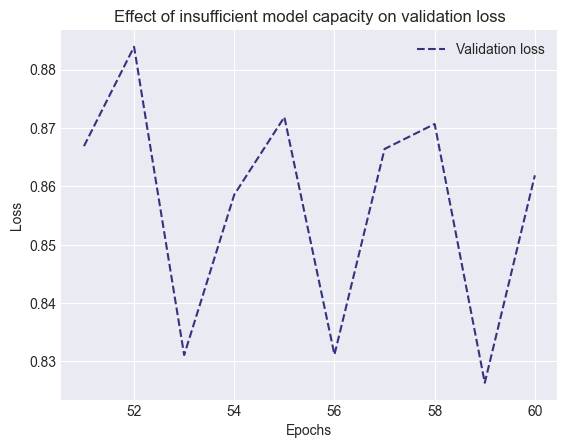

In [14]:
epochs=10
hist_model = model.fit(
    [OHLCK_train, X_train, Inputs_expirty_train], \
        y_train, epochs=epochs, batch_size=3000, validation_split=0.2
    )

val_loss = hist_model.history['val_loss']
plt.style.use('seaborn-darkgrid')
plt.plot(range(cum_epochs+1, cum_epochs+epochs+1, 1), val_loss, ls='--', color=[0.2, 0.2, 0.5], label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
cum_epochs = cum_epochs + epochs

In [15]:


test_loss = model.evaluate([OHLCK_test, X_test, Inputs_expirty_test], y_test)
print("Test Loss:", test_loss)

# 查看測試輸出
y_pred = model.predict([OHLCK_test, X_test, Inputs_expirty_test])

19/19 [==============================] - 0s 11ms/step - loss: 0.4713 - mse: 0.4713
Test Loss: [0.4713094234466553, 0.4713094234466553]
19/19 [==============================] - 0s 10ms/step


In [13]:
columns_names = ['履約價', '隱含波動率({})'.format(s_c)]
column_index = [IV_data.columns.get_loc(col) for col in columns_names]
ForecastIV = np.zeros(((len(y_pred), K_num)))



for i in range(len(y_pred)):
    x = IV_matrix_test[i*K_num:(i+1)*K_num, column_index[0]]
    v0 = IV_matrix_test[i*K_num, column_index[1]]
    ForecastIV[i] = recovery_curve(x, y_pred[i]/(magnification_slope), y0=v0)
ForecastIV = np.reshape(ForecastIV,(-1,1))
Forecast_matrix  = np.hstack((IV_matrix_test, ForecastIV))
column = np.hstack((IV_data.columns.to_numpy(), np.array(['預測隱含波動率({})'.format(s_c)])))
Forecast_Data = pd.DataFrame(data=Forecast_matrix, columns=column)


Forecast_Data.to_csv(current_path + 'slope_OCHL_E_01.csv', index=False, encoding='Big5')